# DATOS

IMPORT DE LIBRERIAS

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

CARGA DE DATOS

In [12]:
df = pd.read_csv("Canciones_Spotify.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


DEFINIMOS LOS DATOS RELEVANTES

In [13]:
X = df[["danceability", "energy", "loudness", "speechiness"]]
Y = df["target"]

SEPARAMOS ENTRE DATOS DE PRUEBA Y DATOS DE TESTEO

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

# KNN

CREAMOS MODELO PREDICTIVO Y ENTRENAMOS

In [57]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

VALIDACION SIMPLE

In [58]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 64.52%


VALIDACION CRUZADA

In [59]:
scores = cross_val_score(knn, X, Y, cv=5)
average_accuracy = scores.mean()
print("Precisión promedio del modelo (Validación Cruzada k-fold): {:.2f}%".format(average_accuracy * 100))

Precisión promedio del modelo (Validación Cruzada k-fold): 62.07%


MATRIS DE CONFUSION

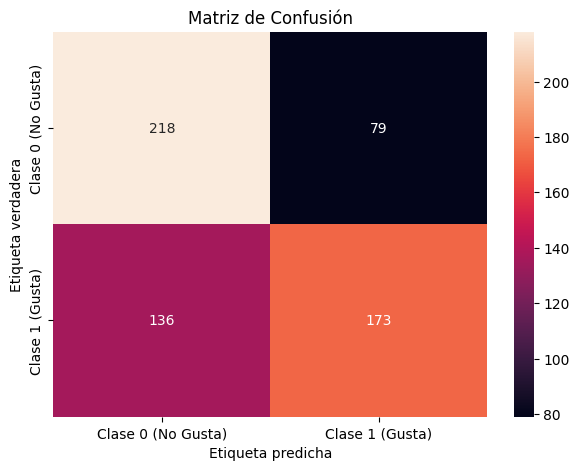

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['Clase 0 (No Gusta)', 'Clase 1 (Gusta)'], yticklabels=['Clase 0 (No Gusta)', 'Clase 1 (Gusta)'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

PRECISION, RECALL  Y F1-SCORE

In [61]:
precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

recall = recall_score(y_test, y_pred)
print("Recuperación (Sensibilidad):", recall)

f1 = f1_score(y_test, y_pred)
print("Puntaje F1:", f1)

Precisión: 0.6865079365079365
Recuperación (Sensibilidad): 0.5598705501618123
Puntaje F1: 0.6167557932263814


GRID SEARCH

In [56]:
param_grid = {
    'n_neighbors': [13, 16, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [10, 20, 30],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión con mejores hiperparámetros:", accuracy)

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Precisión con mejores hiperparámetros: 0.6666666666666666


RANDOM SEARCH

In [52]:
# Define una distribución de hiperparámetros para muestreo aleatorio
param_dist = {
    'n_neighbors': np.arange(1, 21),  # Valores posibles para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores posibles para el peso de los vecinos
    'metric': ['euclidean', 'manhattan']  # Valores posibles para la métrica de distancia
}

random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)

best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión con mejores hiperparámetros:", accuracy)

Mejores hiperparámetros: {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}
Precisión con mejores hiperparámetros: 0.6567656765676567
